<a href="https://colab.research.google.com/github/kate-simonova/cancer-subtyping/blob/main/03_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Data Loading and installation of packages

In [ ]:
!pip install umap-learn
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing necessary packages
from google.colab import drive
drive.mount('/content/drive') 
path = "/content/drive/MyDrive/MY_DATA/merged"

import re

import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA, PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import KFold
from keras.layers import Layer, Activation
from keras.callbacks import Callback

import keras
keras.backend.clear_session()

import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, Lambda
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler

from keras.layers import Input, Dense, Lambda, Activation
from keras.models import Model
from keras import backend as K
from keras import metrics
from tensorflow.python.framework.ops import disable_eager_execution

Mounted at /content/drive


## Loading data 

Data were previosuly generated in [data splitting step](https://colab.research.google.com/drive/1FoqO_K2jZzqqD49h6zzHFwUWCHT_Ddg4).

In [ ]:
test_df = pd.read_csv(f"{path}/split_circle/X_test_A_merged_CRC_BRCA.csv.tar.gz", compression = "gzip", index_col=0).T
test_df.shape

(2156, 22596)

In [ ]:
y_test = pd.read_csv(f"{path}/split_circle/y_test_A_merged_CRC_BRCA.csv.tar.gz", compression = "gzip", index_col=0)
#y_test = y_test.reset_index(drop=True)
#y_test.index = test_df.index
y_test.shape

(2156, 7)

In [ ]:
train_df = pd.read_csv(f"{path}/split_circle/X_train_A_merged_CRC_BRCA.csv.tar.gz", compression="gzip", index_col=0).T
train_df.shape

(11544, 22596)

In [ ]:
y_train = pd.read_csv(f"{path}/split_circle/y_train_A_merged_CRC_BRCA.csv.tar.gz", compression = "gzip", index_col=0)
#y_train = y_train.reset_index(drop=True)
#y_train.index = train_df.index
y_train.shape

(11544, 7)

# Dimensionality reduction with PCA

In [ ]:
pca = PCA(0.95).fit(train_df)
x_train = pca.transform(train_df)
x_test = pca.transform(test_df)
print(x_train.shape)
print(x_test.shape)

(11544, 4557)
(2156, 4557)


In [ ]:
x_test = pd.DataFrame(x_test, index=test_df.index)
x_train = pd.DataFrame(x_train, index=train_df.index)
x_test.shape

(2156, 4557)

In [ ]:
x_test.columns = ["PC"+ str(i+1) for i in range(4557)]

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train["Label"], test_size=0.2, random_state=42, stratify=y_train["Label"])
X_tr.shape

# Oversampling and synthetic data generation

In [ ]:
mapp = LabelEncoder()

y_train_adasyn = mapp.fit_transform(y_train["Label"]).ravel()

before_counter = Counter(y_train["Label"])
print('Before', before_counter)

ada = ADASYN(random_state=0, sampling_strategy='all')
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train_adasyn)

after_counter = Counter(y_train_ada)
print('After', after_counter)

Before Counter({'Luminal A': 4256, 'Luminal B': 2237, 'Basal-like': 1654, 'Her2': 1076, 'CMS2': 775, 'Normal-like': 491, 'CMS4': 376, 'CMS1': 286, 'CMS3': 231, 'Claudin-low': 162})
After Counter({6: 4272, 9: 4268, 5: 4267, 7: 4256, 4: 4252, 1: 4248, 3: 4242, 2: 4218, 0: 4158, 8: 4116})


In [ ]:
mapping = dict(zip(mapp.classes_, mapp.transform(mapp.classes_)))
print(mapping)

{'Basal-like': 0, 'CMS1': 1, 'CMS2': 2, 'CMS3': 3, 'CMS4': 4, 'Claudin-low': 5, 'Her2': 6, 'Luminal A': 7, 'Luminal B': 8, 'Normal-like': 9}


In [ ]:
x_train_ada = pd.DataFrame(x_train_ada)
y_train_ada = pd.DataFrame(y_train_ada)
y_train_ada.columns = ["Label"]

In [ ]:
y_train_ada

array([2, 3, 3, ..., 9, 9, 9])

# Variational autoencoder

In [ ]:
import gc

del encoder, vae
K.clear_session()
gc.collect()

NameError: ignored

In [ ]:
#y_train_ada = pd.read_pickle(f"{path}/pickle/y_train_ada_circle.pkl")
#x_train_ada = pd.read_pickle(f"{path}/pickle/x_train_ada_circle.pkl")
#x_test = pd.read_pickle(f"{path}/pickle/x_test_circle.pkl")
#y_test = pd.read_pickle(f"{path}/pickle/y_test_circle.pkl")
#X_val = pd.read_pickle(f"{path}/pickle/X_val_circle.pkl")
#y_val = pd.read_pickle(f"{path}/pickle/y_val_circle.pkl")

In [ ]:
x_train_ada

,0,1,2,3,4,5,6,7,8,9,...,4547,4548,4549,4550,4551,4552,4553,4554,4555,4556
0,12.274826,36.530659,19.482128,-20.974482,8.381638,-5.865438,-8.225289,-0.803613,0.171490,-2.185809,...,0.140548,0.186426,-0.263698,0.118027,0.173544,0.309825,0.043288,-0.175324,-0.373842,0.291977
1,11.600466,21.086452,9.820620,13.335078,1.771775,-1.889209,-10.515924,1.568554,-10.526720,4.445639,...,0.263033,0.120143,-0.164163,0.045422,0.228182,0.101197,-0.367908,0.131092,-0.519238,0.162462
2,10.156317,18.035262,-19.505176,-5.275327,-1.828789,-2.033097,2.348628,-1.265188,-2.633313,0.687709,...,-0.332208,-0.267642,0.058030,-0.160483,0.015299,0.025495,0.021312,0.447342,0.197395,-0.736638
3,0.268981,-35.060825,19.283566,6.714026,14.508100,12.507948,0.311915,1.899709,8.096542,1.803489,...,-0.268752,0.329053,-0.345284,-0.078363,0.159181,-0.145672,0.199554,0.561027,-0.240143,0.087657
4,-20.173860,-20.289051,8.178842,-13.120544,-9.799398,-7.425660,-0.632836,0.464587,-4.465496,13.924570,...,0.235805,0.439011,0.544248,-0.381840,0.008682,-0.325774,-0.502826,-0.285031,0.300070,0.285291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33914,32.091917,0.989462,21.609068,-0.479054,-11.047549,14.064228,5.832311,10.877337,0.079430,-6.661612,...,0.081937,-0.194082,-0.070867,0.014594,-0.083400,0.008059,0.118251,-0.092516,0.160675,0.002754
33915,20.943983,-4.274181,24.516973,-6.807001,-10.125250,19.305950,11.725083,10.336371,-0.242646,-10.010815,...,-0.217663,-0.055551,0.075559,0.103837,0.111787,-0.160399,0.196858,-0.081156,-0.140888,-0.025571
33916,28.856373,-18.754434,7.174762,10.937106,-14.072002,21.821416,7.268500,12.610332,2.154578,-2.855083,...,-0.396198,-0.155353,-0.016878,0.198918,-0.118357,-0.170937,0.137027,0.300203,0.055343,0.308930
33917,28.845378,-18.632547,7.272540,10.808300,-14.019257,21.799341,7.272250,12.624797,2.131454,-2.899118,...,-0.395570,-0.154195,-0.013924,0.197750,-0.115885,-0.170200,0.137582,0.299649,0.055507,0.306373


In [ ]:
#pd.DataFrame(y_train_ada).to_pickle(f"{path}/pickle/y_train_ada_latest.pkl")
#pd.DataFrame(x_train_ada).to_pickle(f"{path}/pickle/x_train_ada_latest.pkl")

#x_test.to_pickle(f"{path}/pickle/x_test_latest.pkl")

In [ ]:
y_train_ada = pd.read_pickle(f"{path}/pickle/y_train_ada_latest.pkl")
x_train_ada = pd.read_pickle(f"{path}/pickle/x_train_ada_latest.pkl")

x_test = pd.read_pickle(f"{path}/pickle/x_test_latest.pkl")

In [ ]:
# scale data 
from sklearn.preprocessing import MinMaxScaler
t = MinMaxScaler().fit(x_train_ada)
X_train_scaled = t.transform(x_train_ada)
#X_val_scaled = t.transform(X_val)
X_test_scaled = t.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Function for reparameterization trick to make model differentiable

def sampling(args):
    
    import tensorflow as tf
    # Function with args required for Keras Lambda function
    z_mean, z_log_var = args

    # Draw epsilon of the same shape from a standard normal distribution
    epsilon = K.random_normal(shape=tf.shape(z_mean), mean=0.,
                              stddev=epsilon_std)
    
    # The latent vector is non-deterministic and differentiable
    # in respect to z_mean and z_log_var
    z = z_mean + K.exp(z_log_var / 2) * epsilon
    return z

class CustomVariationalLayer(Layer):
    """
    Define a custom layer that learns and performs the training
    This function is borrowed from:
    https://github.com/fchollet/keras/blob/master/examples/variational_autoencoder.py
    """
    def __init__(self, **kwargs):
        # https://keras.io/layers/writing-your-own-keras-layers/
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa
    # Behavior on each epoch
    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)


In [ ]:
# define the size of the latent space
original_dim = x_train_ada.shape[1]
latent_dim = 50
batch_size = 512
epochs = 200
learning_rate = 0.00015

epsilon_std = 1.0
beta = K.variable(0)
kappa = 1

In [ ]:
# Encoder
# Input place holder for RNAseq data with specific input size
rnaseq_input = Input(shape=(original_dim, ))

# Input layer is compressed into a mean and log variance vector of size `latent_dim`
# Each layer is initialized with glorot uniform weights and each step (dense connections,
# batch norm, and relu activation) are funneled separately
# Each vector of length `latent_dim` are connected to the rnaseq input tensor
z_mean_dense_linear = Dense(latent_dim, kernel_initializer='glorot_uniform')(rnaseq_input)
z_mean_dense_batchnorm = BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = Activation('gelu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = Dense(latent_dim, kernel_initializer='glorot_uniform')(rnaseq_input)
z_log_var_dense_batchnorm = BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = Activation('gelu')(z_log_var_dense_batchnorm)

# return the encoded and randomly sampled z vector
# Takes two keras layers as input to the custom sampling function layer with a `latent_dim` output
z = Lambda(sampling, output_shape=(latent_dim, ))([z_mean_encoded, z_log_var_encoded])

In [ ]:
# Decoder
decoder_to_reconstruct = Dense(original_dim, kernel_initializer='glorot_uniform', activation='gelu')
rnaseq_reconstruct = decoder_to_reconstruct(z)

In [ ]:
adam = Adam(lr=learning_rate)
vae_layer = CustomVariationalLayer()([rnaseq_input, rnaseq_reconstruct])
vae = Model(rnaseq_input, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta])

vae.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 4557)]       0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 50)           227900      ['input_4[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 50)           227900      ['input_4[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 50)          200         ['dense_9[0][0]']                
 rmalization)                                                                               

In [ ]:
disable_eager_execution()

hist = vae.fit(np.array(X_train_scaled),
               epochs=epochs,
               verbose=0,
               batch_size=batch_size,
               validation_data=(np.array(X_val_scaled), None),
               callbacks=[WarmUpCallback(beta, kappa)])

ValueError: ignored

In [ ]:
plot_model(vae)

In [ ]:
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
encoder = Model(rnaseq_input, z_mean_encoded)

In [ ]:
# testing data
x_test_encoded = encoder.predict(X_test_scaled, batch_size=batch_size) # X_test_scaled

temp = pd.DataFrame(x_test_encoded).reset_index()
temp

,index,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,0,0.813978,0.034304,-0.138385,0.023659,0.858496,1.310539,0.085009,0.933837,0.321365,...,0.253905,0.007144,1.337824,0.985740,0.430511,1.903935,2.076302,-0.099974,1.144478,2.720396
1,1,-0.010307,-0.162665,1.371191,0.631584,-0.146819,1.016971,-0.099609,0.092845,-0.073709,...,-0.122062,-0.098201,0.474340,0.198049,-0.036991,0.772392,-0.014499,-0.104503,0.753066,1.086632
2,2,-0.166531,0.883531,-0.149403,-0.021492,-0.124863,0.212593,0.855761,-0.047874,-0.013254,...,0.802752,0.260408,-0.147036,0.195075,1.778080,2.619074,-0.158729,-0.003332,-0.095238,1.131071
3,3,0.315563,0.030576,0.261325,0.492417,2.940787,1.626618,1.686944,0.902159,1.875275,...,-0.164253,0.909141,1.949654,0.387453,0.143623,0.691164,0.989879,0.108470,0.793490,0.227866
4,4,1.445847,-0.094258,-0.043909,0.957756,0.919686,0.997377,1.358455,0.163847,1.129921,...,-0.093112,1.077867,0.326034,0.108830,0.042532,0.324776,1.456211,0.072304,0.500636,0.325651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2151,0.383579,0.014833,0.152904,1.070466,-0.165756,1.781122,1.061129,0.468211,0.652665,...,-0.032927,2.016425,0.876193,0.541602,2.648481,1.429955,0.290847,-0.108674,1.578215,-0.167062
2152,2152,1.605507,0.082936,0.123267,-0.078949,0.368250,-0.029578,-0.169905,0.474656,0.933525,...,-0.151322,0.592680,0.324494,0.861944,-0.166413,1.910821,-0.169140,-0.119289,0.734402,1.532928
2153,2153,0.466124,1.457700,1.812516,2.652836,0.137167,0.892337,0.898731,0.538793,0.041432,...,-0.124383,0.470545,0.376830,0.179856,0.864443,0.392427,0.776329,1.793663,0.539945,0.275950
2154,2154,-0.054760,0.135444,0.203186,0.662257,0.443430,-0.106505,1.768190,0.533879,-0.017878,...,-0.148893,0.123102,1.676513,0.878446,0.191181,-0.001049,0.156658,0.384941,0.582924,0.603407


In [ ]:
silhouetteScore = silhouette_score(temp, y_test["Label"], metric="euclidean")
davies_bouldinScore = davies_bouldin_score(temp, y_test["Label"])

print("Silhuette", silhouetteScore, "davies_bouldinScore", davies_bouldinScore)

Silhuette -0.21981339776353218 davies_bouldinScore 32.232931611864586


In [ ]:
# validation
x_test_encoded = encoder.predict(X_val_scaled, batch_size=batch_size) # X_test_scaled

temp = pd.DataFrame(x_test_encoded).reset_index()

silhouetteScore = silhouette_score(temp, y_val, metric="euclidean")
davies_bouldinScore = davies_bouldin_score(temp, y_val)

print("Silhuette", silhouetteScore, "davies_bouldinScore", davies_bouldinScore)

Silhuette -0.07713830696630734 davies_bouldinScore 363.01564256891925


# Testing different batch sizes of VAE (quaestion for discussion for the state exam)

At the end, the variational autoencoder was not presented in the
thesis due to lack of performance. It is not clear whether all
hyperparameters of standard autoencoder presented in Methods
were tested on variational autoencoder. I would expect poor
performance of the variational autoencoder with small batches due to
amplification of the noise. Did you test all batch sizes on the
variational autoencoder?

In [ ]:
import gc

disable_eager_execution()

batch_sizes = [64, 128, 256, 512, 1024, 2048]

latent_dim = 50
epochs = 200
learning_rate = 0.00015

epsilon_std = 1.0
beta = K.variable(0)
kappa = 1
l = []

cnt = 0
kf = KFold(n_splits=5, shuffle=True, random_state=811)

for batch_size in batch_sizes:
  for train_index, val_index in kf.split(x_train_ada.index):
    cnt+=1
    X_val = x_train_ada.iloc[val_index, :]
    y_val = y_train_ada.iloc[val_index, :]
    X_train = x_train_ada.iloc[train_index, :]

    from sklearn.preprocessing import MinMaxScaler
    t = MinMaxScaler().fit(X_train)
    X_train_scaled = t.transform(X_train)
    X_val_scaled = t.transform(X_val)

    original_dim = X_train_scaled.shape[1]
    rnaseq_input = Input(shape=(original_dim, ))

    z_mean_dense_linear = Dense(latent_dim, kernel_initializer='glorot_uniform')(rnaseq_input)
    z_mean_dense_batchnorm = BatchNormalization()(z_mean_dense_linear)
    z_mean_encoded = Activation('gelu')(z_mean_dense_batchnorm)

    z_log_var_dense_linear = Dense(latent_dim, kernel_initializer='glorot_uniform')(rnaseq_input)
    z_log_var_dense_batchnorm = BatchNormalization()(z_log_var_dense_linear)
    z_log_var_encoded = Activation('gelu')(z_log_var_dense_batchnorm)

    # return the encoded and randomly sampled z vector
    z = Lambda(sampling, output_shape=(latent_dim, ))([z_mean_encoded, z_log_var_encoded])

    decoder_to_reconstruct = Dense(original_dim, kernel_initializer='glorot_uniform', activation='gelu')
    rnaseq_reconstruct = decoder_to_reconstruct(z)

    adam = Adam(lr=learning_rate)
    vae_layer = CustomVariationalLayer()([rnaseq_input, rnaseq_reconstruct])
    vae = Model(rnaseq_input, vae_layer)
    vae.compile(optimizer=adam, loss=None, loss_weights=[beta])

    history = vae.fit(np.array(X_train_scaled),
                epochs=epochs,
                verbose=0,
                batch_size=batch_size,
                validation_data=(np.array(X_val_scaled), None),
                callbacks=[WarmUpCallback(beta, kappa)])
    
    encoder = Model(rnaseq_input, z_mean_encoded)

    x_test_encoded = encoder.predict(X_val_scaled, batch_size=batch_size) # X_test_scaled
    a = y_val[0].tolist()

    temp = pd.DataFrame(x_test_encoded)

    km = KMeans(n_clusters=10, random_state=42)
    y_pred = km.fit_predict(temp)
    ari = adjusted_rand_score(y_pred, a)

    silhouetteScore = silhouette_score(temp, a, metric="euclidean")
    davies_bouldinScore = davies_bouldin_score(temp, a)
    #del vae, encoder, history
    #K.clear_session()
    #gc.collect()
    l.append((cnt, batch_size, silhouetteScore, davies_bouldinScore))
    ae_df = pd.DataFrame.from_records(l, columns=["CNT","Batch size", "Silhouette", "DB score"])
    ae_df.to_csv(f"{path}/autoencoder_grid_search_VAE.csv")

Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress 

## VAE (batch effect)

In [ ]:
data = pd.read_csv(f"{path}/../VAE.csv.zip", compression="zip", sep=";")
data

,Batch size,Silhouette,DB score
0,64,-0.132,8.480773
1,64,-0.126,11.658598
2,64,-0.123,9.310343
3,64,-0.122,9.497042
4,64,-0.128,10.252876
5,128,-0.130,8.905380
6,128,-0.120,13.970644
7,128,-0.130,11.684253
8,128,-0.110,13.072489
9,128,-0.120,13.106810


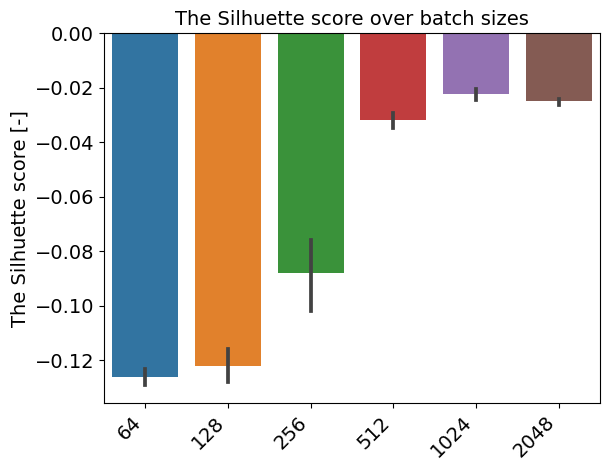

In [ ]:
sns.barplot(data=data, x="Batch size", y="Silhouette")
plt.title("The Silhuette score over batch sizes",fontsize=14)
plt.ylabel("The Silhuette score [-]", fontsize=14)
plt.xlabel("", fontsize=14)
plt.xticks(fontsize=14, rotation=45, ha="right")
plt.yticks(fontsize=14)
plt.show()

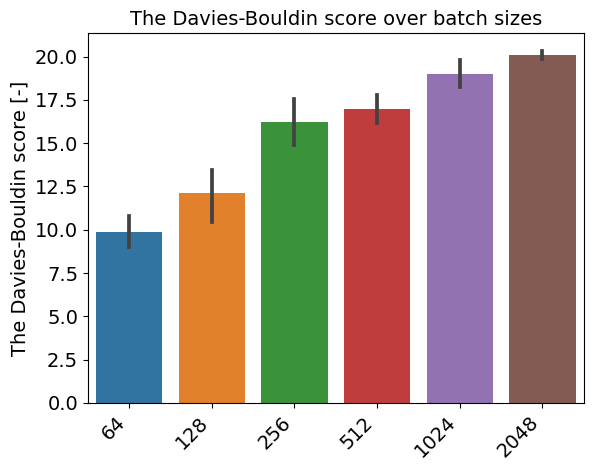

In [ ]:
sns.barplot(data=data, x="Batch size", y="DB score")
plt.title("The Davies-Bouldin score over batch sizes",fontsize=14)
plt.ylabel("The Davies-Bouldin score [-]", fontsize=14)
plt.xlabel("", fontsize=14)
plt.xticks(fontsize=14, rotation=45, ha="right")
plt.yticks(fontsize=14)
plt.show()